# Programming Question 1 

In [44]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load( 'tf_flowers', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True )

In [46]:

size = 128
def prep(image, label):
    img = tf.cast(image, tf.float32) / 255.0
    img = tf.image.resize(img, [size, size])
    return img, label

batch = 32
train_ds = ds_train.map(prep).shuffle(500).batch(batch).prefetch(tf.data.AUTOTUNE)
test_ds  = ds_test.map(prep).batch(batch).prefetch(tf.data.AUTOTUNE)

In [47]:
num_classes = ds_info.features['label'].num_classes

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(size, size, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])


In [ ]:

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,077 (49.36 MB)

 Trainable params: 12,939,077 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
epochs = 10
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=test_ds
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 0.3254 - loss: 1.6933 - val_accuracy: 0.4905 - val_loss: 1.2406
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 367ms/step - accuracy: 0.5264 - loss: 1.1621 - val_accuracy: 0.6335 - val_loss: 0.9875
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 364ms/step - accuracy: 0.6017 - loss: 0.9930 - val_accuracy: 0.6104 - val_loss: 0.9440
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 667ms/step - accuracy: 0.6819 - loss: 0.8164 - val_accuracy: 0.6253 - val_loss: 0.9836
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 69s 524ms/step - accuracy: 0.7581 - loss: 0.6417 - val_accuracy: 0.6362 - val_loss: 0.9099
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 367ms/step - accuracy: 0.8326 - loss: 0.4290 - val_accuracy: 0.6553 - val_loss: 1.1103
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.9231 - loss: 0.2442 - val_accuracy: 0.6444 - val_loss: 1.4935
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.9504 - loss: 0.1509 - val_accu

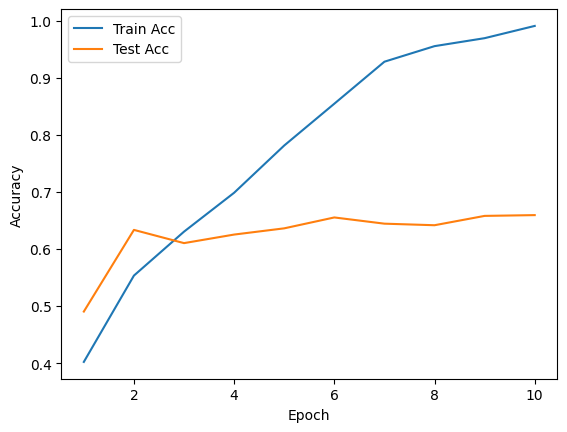

In [50]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
test_acc  = history.history['val_accuracy']
epochs_x  = range(1, epochs + 1)

plt.plot(epochs_x, train_acc, label='Train Acc')
plt.plot(epochs_x, test_acc,  label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:
all_true = []
all_pred = []

for batch_images, batch_labels in test_ds:
    batch_probs = model.predict(batch_images, verbose=0)
    batch_preds = np.argmax(batch_probs, axis=1)
    all_true.extend(batch_labels.numpy())
    all_pred.extend(batch_preds)




class_names = ds_info.features['label'].names

print("Classification Report:")
print(classification_report(all_true, all_pred, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(all_true, all_pred))

Classification Report:
              precision    recall  f1-score   support

   dandelion       0.68      0.67      0.68       159
       daisy       0.60      0.69      0.64       120
      tulips       0.70      0.61      0.65       186
  sunflowers       0.73      0.79      0.76       138
       roses       0.57      0.54      0.55       131

    accuracy                           0.66       734
   macro avg       0.65      0.66      0.66       734
weighted avg       0.66      0.66      0.66       734

Confusion Matrix:
[[107  21   9  17   5]
 [ 17  83   4   6  10]
 [ 14  13 114  11  34]
 [ 13   4   7 109   5]
 [  7  17  30   6  71]]


# Programming Question 2

In [65]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [70]:
df = pd.read_csv('A6.csv')

prices = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler((0, 1))
prices_scaled = scaler.fit_transform(prices)


In [71]:


scaler = MinMaxScaler((0, 1))
prices_scaled = scaler.fit_transform(prices)


In [ ]:
seq_len = 60
X, y = [], []
for i in range(seq_len, len(prices_scaled)):
    X.append(prices_scaled[i-seq_len:i, 0])
    y.append(prices_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)  

In [73]:
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [74]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Kethan Challa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

Epoch 1/20
44/44 - 8s - 192ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 2/20
44/44 - 2s - 51ms/step - loss: 3.1957e-04 - val_loss: 0.0018
Epoch 3/20
44/44 - 2s - 36ms/step - loss: 2.8385e-04 - val_loss: 0.0013
Epoch 4/20
44/44 - 2s - 36ms/step - loss: 2.5808e-04 - val_loss: 8.0630e-04
Epoch 5/20
44/44 - 2s - 36ms/step - loss: 2.5294e-04 - val_loss: 9.2991e-04
Epoch 6/20
44/44 - 2s - 54ms/step - loss: 2.1078e-04 - val_loss: 6.8120e-04
Epoch 7/20
44/44 - 2s - 45ms/step - loss: 2.0045e-04 - val_loss: 6.7027e-04
Epoch 8/20
44/44 - 3s - 62ms/step - loss: 2.3641e-04 - val_loss: 0.0012
Epoch 9/20
44/44 - 2s - 48ms/step - loss: 2.0543e-04 - val_loss: 7.4591e-04
Epoch 10/20
44/44 - 2s - 40ms/step - loss: 1.9062e-04 - val_loss: 6.5818e-04
Epoch 11/20
44/44 - 1s - 32ms/step - loss: 1.6438e-04 - val_loss: 5.7189e-04
Epoch 12/20
44/44 - 1s - 28ms/step - loss: 1.6128e-04 - val_loss: 7.1760e-04
Epoch 13/20
44/44 - 1s - 31ms/step - loss: 1.6508e-04 - val_loss: 5.4107e-04
Epoch 14/20
44/44 - 1s - 32

In [76]:
pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


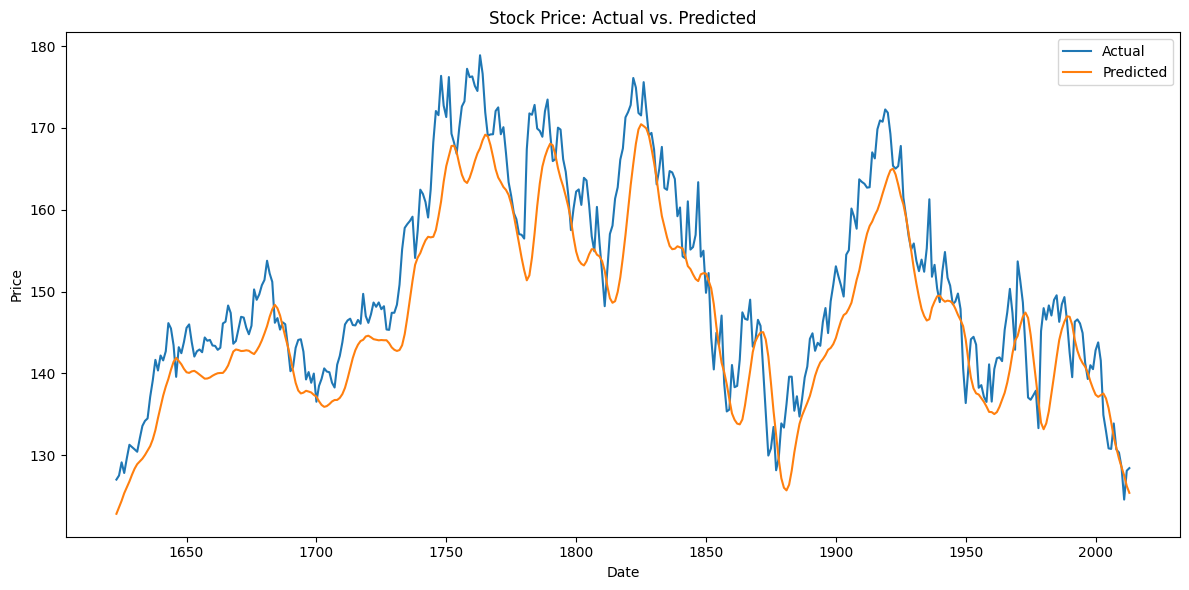

In [ ]:
plt.figure(figsize=(12, 6))
dates = df.index[-len(actual):]  
plt.plot(dates, actual, label='Actual')
plt.plot(dates, pred,   label='Predicted')
plt.title('Stock Price: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()
